In [0]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded1 = drive.CreateFile({'id':"1UVyGVSHAbRuuoFkIGxgFrfaEEw64vJRM"})   # replace the id with id of file you want to access
downloaded2 = drive.CreateFile({'id':"17b4wCUsEZjRJLhZ2Tv10mongpecIvF9B"})
downloaded1.GetContentFile('two_Microchip_Tests.txt')        # replace the file name with your file
downloaded2.GetContentFile('two_Exam_Tests.txt')        # replace the file name with your file

In [0]:
#import libraries
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import random;
import numpy as np;

In [64]:
#Two different datasets are avaialble for testing in this notebook. You may activate any one of the following two lines to use one or the other data set. 
#C = pd.read_csv('two_Exam_Tests.txt', names = ['Exam1', 'Exam2', 'Result'])
C = pd.read_csv('two_Microchip_Tests.txt', names = ['Exam1', 'Exam2', 'Result'])
C

,Exam1,Exam2,Result
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


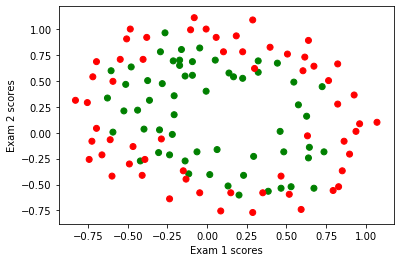

In [65]:
#Ploting function
def plot_Exam_Data(normalize):
  Color_Arr = ['g']*C.shape[0];
  for i in range(0,C.shape[0]):
    if(C.Result[i] ==0): Color_Arr[i] ='r';
  if(normalize ==0):
    plt.scatter(C.Exam1, C.Exam2, c = Color_Arr)
  else:
    plt.scatter(X1, X2, c = Color_Arr)
  plt.xlabel('Exam 1 scores');
  plt.ylabel('Exam 2 scores');

plot_Exam_Data(0)

In [0]:
#Normalization
X1 = C.Exam1;
X1_Mean = np.mean(X1);
X1_Std = np.std(X1);
X1_N = (X1-np.mean(X1))/np.std(X1);
X2 = C.Exam2;
X2_Mean = np.mean(X2);
X2_Std = np.std(X2);
X2_N = (X2-np.mean(X2))/np.std(X2);
X3 = np.square(C.Exam1);
X3_Mean = np.mean(X3);
X3_Std = np.std(X3);
X3_N = (X3-np.mean(X3))/np.std(X3);
X4 = np.square(C.Exam2);
X4_Mean = np.mean(X4);
X4_Std = np.std(X4);
X4_N = (X4-np.mean(X4))/np.std(X4);

Y = C.Result

In [0]:
#random Initialization
m = X1.shape[0];

a0 = random.uniform(-1,1);
a1 = random.uniform(-1,1);
a2 = random.uniform(-1,1);
a3 = random.uniform(-1,1);
a4 = random.uniform(-1,1);
learning_Rate = 1;

In [0]:
#Sigmoid Function
def sigmoid(x):
  z = 1/(1 + np.exp(-x))
  return z;

In [0]:
#activation function
def plot_Sigmoid_Surface(theta0,theta1, theta2, theta3, theta4, X1, X2):
  grid_X1 = np.arange(np.amin(X1), np.amax(X1),0.1);
  grid_X2 = np.arange(np.amin(X2), np.amax(X2),0.1);
  grid_X1_Sqr = np.square(grid_X1);
  grid_X2_Sqr = np.square(grid_X2);
  grid_X1_N =  (grid_X1 - X1_Mean)/X1_Std;
  grid_X2_N =  (grid_X1 - X2_Mean)/X2_Std;
  grid_X3_N =  (grid_X1_Sqr - X3_Mean)/X3_Std;
  grid_X4_N =  (grid_X2_Sqr - X4_Mean)/X4_Std;
  H = np.zeros([grid_X2.shape[0], grid_X1.shape[0]]);
  for i in range(0, grid_X2.shape[0]):
    for j in range(0,grid_X1.shape[0]):
      H[i,j] = sigmoid(theta0+theta1*grid_X1_N[j]+theta2*grid_X2_N[i]+ theta3*grid_X3_N[j]+theta4*grid_X4_N[i])
  plt.contour(grid_X1, grid_X2, H, levels = [0.5]);

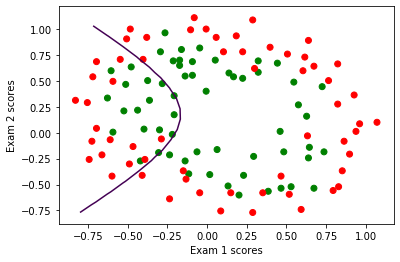

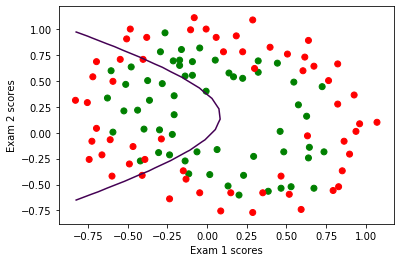

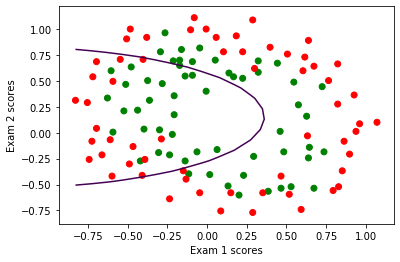

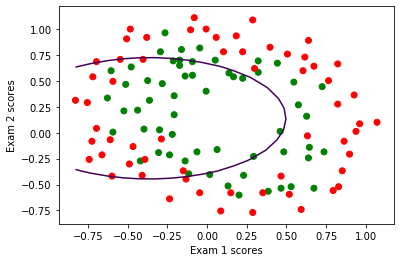

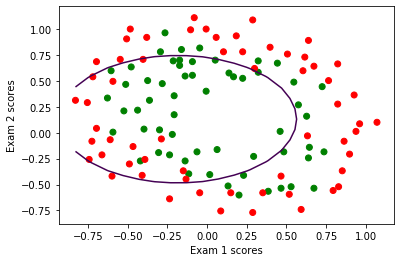

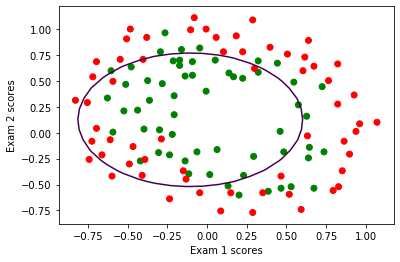

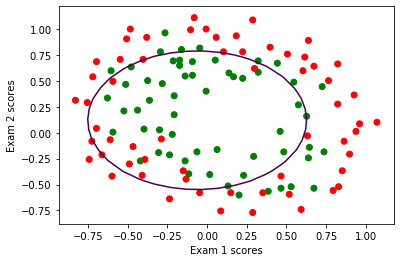

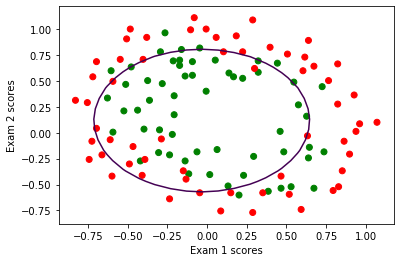

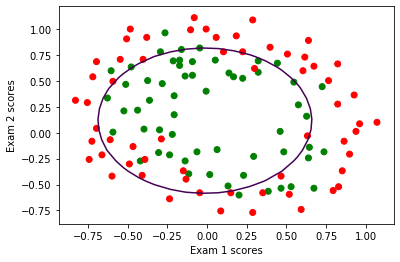

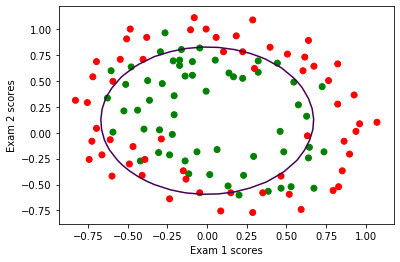

In [70]:
#Computing cost and weight updation 
for i in range(0,10):
    h = sigmoid(a0+a1*X1_N+a2*X2_N+a3*X3_N+a4*X4_N);
    E = -(1/m)*np.sum(Y*np.log(h) + (1-Y)*(np.log(1-h)));
    a0 = a0 - (learning_Rate/m)*np.sum(h-Y);
    a1 = a1 - (learning_Rate/m)*np.sum((h-Y)*X1_N);
    a2 = a2 - (learning_Rate/m)*np.sum((h-Y)*X2_N);
    a3 = a3 - (learning_Rate/m)*np.sum((h-Y)*X3_N);
    a4 = a4 - (learning_Rate/m)*np.sum((h-Y)*X4_N);
    plt.figure()
    plot_Exam_Data(0)
    plot_Sigmoid_Surface(a0,a1, a2,a3, a4, X1, X2)

#Assignement 1 (1):

Increase the model complexity to fit the microchip dataset better.

In [0]:
#Normalization
X5 = np.power(C.Exam1, 3);
X5_Mean = np.mean(X5);
X5_Std = np.std(X5);
X5_N = (X5-np.mean(X5))/np.std(X5);
X6 = np.power(C.Exam2, 3);
X6_Mean = np.mean(X6);
X6_Std = np.std(X6);
X6_N = (X6-np.mean(X6))/np.std(X6);

In [0]:
#activation finction
def plot_Sigmoid_Surface_new(theta0,theta1, theta2, theta3, theta4, theta5, theta6, X1, X2):
  grid_X1 = np.arange(np.amin(X1), np.amax(X1),0.1);
  grid_X2 = np.arange(np.amin(X2), np.amax(X2),0.1);
  grid_X1_Sqr = np.square(grid_X1);
  grid_X2_Sqr = np.square(grid_X2);
  grid_X1_cub = np.power(grid_X1,3);
  grid_X2_cub = np.power(grid_X2,3);  
  grid_X1_N =  (grid_X1 - X1_Mean)/X1_Std;
  grid_X2_N =  (grid_X1 - X2_Mean)/X2_Std;
  grid_X3_N =  (grid_X1_Sqr - X3_Mean)/X3_Std;
  grid_X4_N =  (grid_X2_Sqr - X4_Mean)/X4_Std;
  grid_X5_N =  (grid_X1_cub - X5_Mean)/X5_Std;
  grid_X6_N =  (grid_X2_cub - X6_Mean)/X6_Std;
  H = np.zeros([grid_X2.shape[0], grid_X1.shape[0]]);
  for i in range(0, grid_X2.shape[0]):
    for j in range(0,grid_X1.shape[0]):
      H[i,j] = sigmoid(theta0+theta1*grid_X1_N[j]+theta2*grid_X2_N[i]+ theta3*grid_X3_N[j]+theta4*grid_X4_N[i]+ theta5*grid_X5_N[j]+theta6*grid_X6_N[i])
  plt.contour(grid_X1, grid_X2, H, levels = [0.5]);

In [73]:
#Computing cost and weight updation 
a0 = random.uniform(-1,1);
a1 = random.uniform(-1,1);
a2 = random.uniform(-1,1);
a3 = random.uniform(-1,1);
a4 = random.uniform(-1,1);
a5 = random.uniform(-1,1);
a6 = random.uniform(-1,1);
learning_Rate = 1;

for i in range(0,50):
    h = sigmoid(a0+a1*X1_N+a2*X2_N+a3*X3_N+a4*X4_N+a5*X5_N+a6*X6_N);
    E = -(1/m)*np.sum(Y*np.log(h) + (1-Y)*(np.log(1-h)));
    a0 = a0 - (learning_Rate/m)*np.sum(h-Y);
    a1 = a1 - (learning_Rate/m)*np.sum((h-Y)*X1_N);
    a2 = a2 - (learning_Rate/m)*np.sum((h-Y)*X2_N);
    a3 = a3 - (learning_Rate/m)*np.sum((h-Y)*X3_N);
    a4 = a4 - (learning_Rate/m)*np.sum((h-Y)*X4_N);
    a5 = a5 - (learning_Rate/m)*np.sum((h-Y)*X5_N);
    a6 = a6 - (learning_Rate/m)*np.sum((h-Y)*X6_N);
    plt.figure()
    plot_Exam_Data(0)
    plot_Sigmoid_Surface_new(a0,a1, a2,a3, a4, a5, a6, X1, X2)

Output hidden; open in https://colab.research.google.com to view.